# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("summer.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [5]:
df.shape

(31165, 9)

In [6]:
df["Athlete"].unique()

array(['HAJOS, Alfred', 'HERSCHMANN, Otto', 'DRIVAS, Dimitrios', ...,
       'TOTROV, Rustam', 'ALEKSANYAN, Artur', 'LIDBERG, Jimmy'],
      dtype=object)

In [7]:
 df[df["Country"].isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [8]:
df["Country"].isnull().sum()

4

In [9]:
len(df)

31165

In [10]:
df.Sport.unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

### 1. In how many cities Summer Olympics is held so far?

In [11]:
df_=pd.Series(df.City.unique(),name="Cities")
df_

0                    Athens
1                     Paris
2                  St Louis
3                    London
4                 Stockholm
5                   Antwerp
6                 Amsterdam
7               Los Angeles
8                    Berlin
9                  Helsinki
10    Melbourne / Stockholm
11                     Rome
12                    Tokyo
13                   Mexico
14                   Munich
15                 Montreal
16                   Moscow
17                    Seoul
18                Barcelona
19                  Atlanta
20                   Sydney
21                  Beijing
Name: Cities, dtype: object

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [12]:
data=df[df["Medal"]=="Gold"]
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


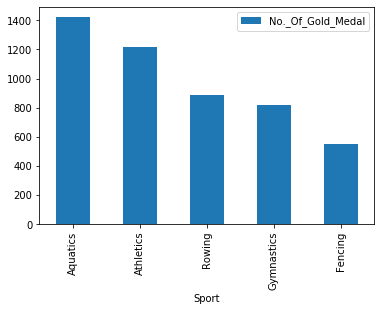

In [14]:
DF=pd.DataFrame(data.groupby("Sport")["Medal"].count())
DF.columns=["No._Of_Gold_Medal"]
DF.sort_values(by="No._Of_Gold_Medal",ascending=False).head().plot(kind="bar")

### 3. Which sport is having most number of medals so far? (Top 5)

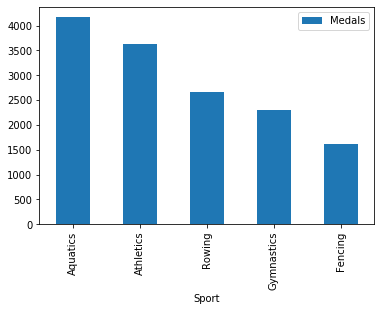

In [15]:
df1=pd.DataFrame(df.groupby("Sport")["Medal"].count())
df1.columns=["Medals"]
df1.sort_values(by="Medals",ascending=False).head().plot(kind="bar")

In [16]:
df1.sort_values(by="Medals",ascending=False).head()

,Medals
Sport,
Aquatics,4170
Athletics,3638
Rowing,2667
Gymnastics,2307
Fencing,1613


### 4. Which player has won most number of medals? (Top 5)

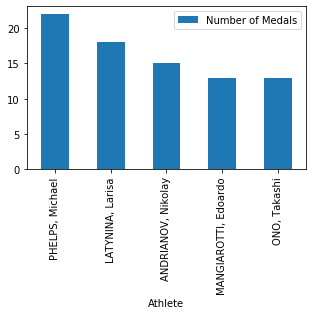

In [17]:
df3=pd.DataFrame(df.groupby("Athlete")["Medal"].count())
df3.columns=["Number of Medals"]
df3.sort_values(by="Number of Medals",ascending=False).head().plot.bar(figsize=(5,3))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

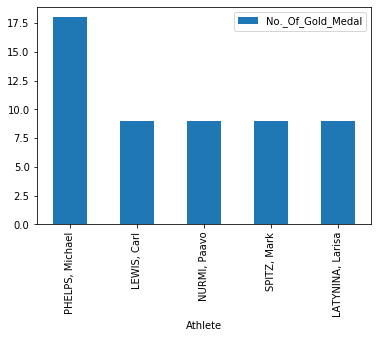

In [18]:
x=pd.DataFrame(data.groupby("Athlete")["Medal"].count())
x.columns=["No._Of_Gold_Medal"]
x.sort_values(by="No._Of_Gold_Medal",ascending=False).head().plot(kind='bar')

In [19]:
x.sort_values(by="No._Of_Gold_Medal",ascending=False).head()

,No._Of_Gold_Medal
Athlete,
"PHELPS, Michael",18
"LEWIS, Carl",9
"NURMI, Paavo",9
"SPITZ, Mark",9
"LATYNINA, Larisa",9


### 6. In which year India won first Gold Medal in Summer Olympics?

In [20]:
f=data[data["Country"]=="IND"]
f.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold


In [21]:
f.groupby("Country")["Year"].min()


Country
IND    1928
Name: Year, dtype: int64

### 7. Which event is most popular in terms on number of players? (Top 5)

In [22]:
lst=[]
for event in df["Event"].unique():
    lst.append([event,len(df[df["Event"]==event])])

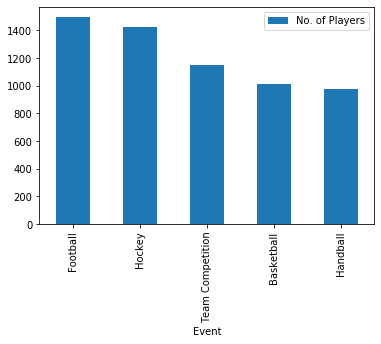

In [23]:
df2=pd.DataFrame(lst,columns=["Event","No. of Players"])
df2.sort_values(by="No. of Players",ascending=False).head().plot(x="Event",y="No. of Players",kind="bar")

In [24]:
df2.sort_values(by="No. of Players",ascending=False).head()

,Event,No. of Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


### 8. Which sport is having most female Gold Medalists? (Top 5)

In [25]:
d=data[data["Gender"]=="Women"]
d.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold


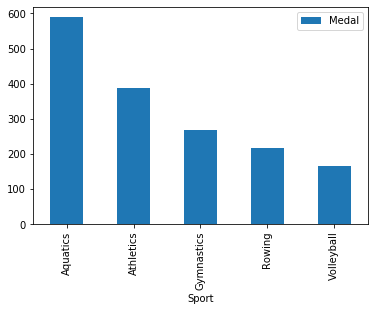

In [26]:
pd.DataFrame(d.groupby("Sport")["Medal"].count()).sort_values(by="Medal",ascending=False).head().plot.bar()

In [27]:
pd.DataFrame(d.groupby("Sport")["Medal"].count()).sort_values(by="Medal",ascending=False).head()

,Medal
Sport,
Aquatics,589
Athletics,389
Gymnastics,268
Rowing,217
Volleyball,166
